<a href="https://colab.research.google.com/github/luizfelipelazzaron/Aula-16/blob/master/APS_Transcal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática Supervisionada
## Grupo 8
**Alunos**


*   HUDSON MONTEIRO
*   DOM RUAN SUZANO FIGUEIRA DA SILVA
*   MARCOS VINÍCIUS DA SILVA
*   LUIZ FELIPE LAZZARON

Imports

In [2]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# k aluminio
k_al = 240 #W/m^2

# Temperatura do ambiente
T_amb = 25 #ºC

## ALETA TIPO VIGA
# Largura da barra
w = 240 #mm
#Espessura da barra
t = 20 #mm

## ALETA TIPO PINO
#Diâmetro do pino
D = 240 #mm

##  DADOS ESPECÍFICOS PARA O GRUPO 8

#Comprimento
L = 175 #mm

## TIPO DE SEÇÃO: CIRCULAR

P = math.pi * D 

# Área
A = math.pi*(D**2) / 4 ## mm^2

<h1>Dados do problema </h1>

# Parte 1
**Ajuste o modelo/condições de contorno e desenvolva um programa em Python que receba as informações necessárias para determinar cada um dos itens a seguir**

In [21]:
def temp_final(Tb, Tinf, P, A, h, K, L):
    """
  Calcula a temperatura final em um material em função da temperatura inicial, do 
  fluxo de calor, da área de seção transversal, do coeficiente de transferência de 
  calor, da condutividade térmica, e do comprimento do material.

  Args:
      Tb (float): temperatura inicial do material  (Kelvin)
      Tinf (float): temperatura ambiente (Kelvin)
      P (float): perímetro da seção transversal do material (m)
      A (float): área de seção transversal do material (m²)
      h (float): coeficiente de transferência de calor (W/m².K)
      K (float): condutividade térmica do material (W/m.K)
      L (float): comprimento do material (m)

  Returns:
      tuple: um tuple contendo o fluxo de calor (qA) e a temperatura final (Tf) em cada ponto

  """

    
    Tf = []

    # Diferença de temperatura entre a base e a temperatura infinita (Kelvin)
    teta_b = Tb - Tinf

    #Parâmetros
    M = teta_b*(h * P * K * A)**0.5
    m = ((h * P) / (K * A))**0.5

    # Fluxo de calor por unidade de área (W/m²)
    qA = M * (((np.sinh(m*L)) + (h / (m * K)) * np.cosh(m*L)) / (np.cosh(m*L) + (h / (m * K)) * np.sinh(m*L)))
    
    # Posições ao longo do comprimento (m)
    tamanhos = np.linspace(0, L, 100)
    for x in tamanhos:

      #Diferença de temperatura
      teta = teta_b * ((np.cosh(m*(L-x)) + (h / (m * K)) * np.sinh(m*(L-x))) / (np.cosh(m*L) + (h / (m * K)) * np.sinh(m*L)))
      
      # Temperaturas em cada posição ao longo do comprimento (Kelvin)
      Tf.append(Tinf + teta)
    return qA, Tf, tamanhos,m

In [22]:
h = 20
Ab = pi*(0.12**2)
P = 2*pi*0.12
Kal = 240
L = 0.175
Al = P*L
teta_b = 373 - 298

In [23]:
qA, Temps, tamanhos,m = temp_final(373, 298, P, Ab, h, Kal, L)

## 1. [1,5 pontos] Qual a temperatura na extremidade da aleta? Apresente um gráfico da distribuição de
temperatura (T_analitica) ao longo do comprimento da aleta. Use legenda, identifique os eixos e as
unidades usadas.

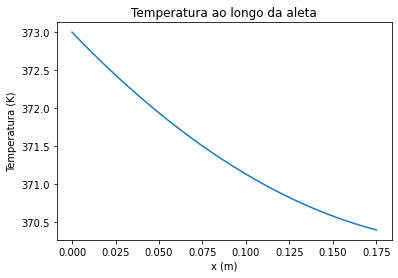

In [17]:
plt.plot(tamanhos, Temps)
plt.xlabel("x (m)")
plt.ylabel("Temperatura (K)")
plt.title("Temperatura ao longo da aleta")
plt.show()

In [7]:
print("Temperatura na extremidade da aleta: {:.2f} K".format(Temps[99]))

Temperatura na extremidade da aleta: 370.39 K


## 2 [1,0 pontos] Determine a taxa de transferência de calor.

In [14]:
print("Taxa de transferência de calor: {:.2f} W".format(qA))

Taxa de transferência de calor: 259.29 W


## 3. [0,5 pontos] Determine a eficiência da aleta

In [9]:
eficiencia = qA/(h*(Ab+Al)*teta_b)
print("Eficiencia: {:.2f}".format(eficiencia))

Eficiencia: 0.98


## 4. [0,5 pontos] Determine a efetividade da aleta.

In [10]:
efetividade = qA/(h*Ab*teta_b)
print("Efetividade: {:.2f}".format(efetividade))

Efetividade: 3.82


## 5. [1,0 pontos] Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor. 

In [18]:
qA_inf = teta_b*((h*P*Kal*Ab)**0.5)
print("Taxa de transferência de calor considerando a aleta infinita: {:.2f} W".format(qA_inf))

Taxa de transferência de calor considerando a aleta infinita: 959.66 W


## 6. [0,5 pontos] Compare o resultado obtido no item 2 com o resultado do item 5, assumindo que foram obtidos com modelos diferentes.

**Podemos concluir que, com a hipótese da aleta infinita, tem-se uma taxa de transferência de calor maior, o que significa que em comprimentos muito pequenos a eficiēncia, bem como a efetividade, são maiores do que no caso 2.**

## 7. [1,0 pontos] Apresente o desenvolvimento matemático para determinar qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a taxa de transferência de calor. 

**Para determinar o comprimento da aleta para a hipótese da aleta infinita, podemos verificar a partir de comprimento de L que a transferência de calor "real" (por convecção) se iguá-la à transferência de calor na aleta infinita:**


Pela tabela:

$$\dot{q}_{convecção}=M \frac{senh{(mL)}+\frac{h}{km}\cosh{(mL)}}{cosh{(mL)}+\frac{h}{km}senh{(mL)}}$$

$$\dot{q}_{aleta infinita}=M$$

Igualando

$$\dot{q}_{convecção} = \dot{q}_{aleta infinita}$$

Temos:

$$M \frac{senh{(mL)}+\frac{h}{km}\cosh{(mL)}}{cosh{(mL)}+\frac{h}{km}senh{(mL)}}=M$$

Simplifcando, considerando M diferente de 0:

$${senh{(mL)}+\frac{h}{km}\cosh{(mL)}}={cosh{(mL)}+\frac{h}{km}senh{(mL)}}$$

$${senh{(mL)}(1-\frac{h}{km})}={cosh{(mL)}(1-\frac{h}{km})}$$

Se 

$$(1-\frac{h}{km})\neq 0$$
Então:
$${senh{(mL)}}={cosh{(mL)}}$$
Se 
$${cosh{(mL)}}\neq 0$$
Chegamos em:
$${tanh{(mL)}}=1$$
De modo que:
$$mL={arctanh{(1)}}$$
Concluindo que
$$L=\frac{{arctanh{(1)}}}{m}$$

$$L=\frac{0.7853981633974483}{1.1785113019775793} m$$

Logo:

$$L=0.67 m$$

In [26]:
np.arctan(1) / m

0.6664324407237548

**O que podemos concluir que para um L menor que 0.67 metros, a consideração de aleta infinita é válida**

# Parte 2
**Um dispositivo experimental usado para medir a condutividade térmica de materiais sólidos, envolve o uso de aletas equivalentes em todos os aspectos, exceto pelo tipo de material em que são fabricadas. Nesse dispositivo, uma das aletas é fabricada com um material-padrão com condutividade térmica conhecida κA enquanto a outra é fabricada com um material cuja condutividade térmica κB se deseja determinar. Para a execução das medidas, uma das extremidades dos dois bastões é fixada a uma mesma fonte de calor com uma temperatura fixa Tb. Em seguida, os bastões são expostos a um fluido com temperatura x de modo que cada um deles esteja instrumentado com termopares para medir a temperatura a uma distância fixa x1 da base (fonte de calor). De acordo com o exposto considere os itens abaixo:**

## 1. [2,0 pontos] Considere válida a condição de aleta infinita e desenvolva um modelo matemático que permita ao usuário do dispositivo determinar a condutividade do material desconhecido. 

Modelo matemático para uma aleta infinita é:
$$\theta_{x}=\theta_{b}*e^{-mx}$$
Onde 
$$m=\sqrt{\frac{hP}{kA_{tr}}}$$
Substituindo os valores de theta e m temos:
$$T(x)= T_{inf}+(T_b-T_{inf})\sqrt{\frac{hP}{kA_{tr}}}$$

## [2,0 ponto] Se o material-padrão for o alumínio, com ka = 240 W/(m²K) e as medições revelarem valores de Ta = 75℃ e Tb= 60℃ em x1, paraTb = 100℃ e Tinfty = 25℃, qual é a condutividade térmica κb do material em teste?

Sendo:
$$k_A = 240 W/(m²K)$$
$$T_A = 75 °C$$
$$T_B = 60 °C$$
$$T_{infty} = 25°C$$
$$T_b = 100°C$$

Temos, isolando o valor de x na equação anterior, que :

$$x  = -\sqrt{\frac{kA_{tr}}{hP}}*ln(\frac{T(x)- T_{inf}}{Tb- T_{inf}})$$
Com o valor de x1 definido pelos valores de T_A, ka, é possível substituir os valores para encontrar o kb.
Depois de uma manipulação algébrica temos que:

In [28]:
ka = 240 # W/(m²K)
T_A = 75 # °C
T_B = 60 # °C
Tinf = 25 # °C
T_b = 100 # °C
kb = ka*(np.log((T_A - Tinf)/(T_b - Tinf))/ np.log((T_B - Tinf)/(T_b - Tinf)))**2

In [30]:
kb

67.92797153154885

Logo, o valor de x=67.92